## Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys, os

ROOT_PATH = os.path.abspath(os.path.join("..", ".."))
SRC_PATH = os.path.join(ROOT_PATH, "flaresight")
YOLOV5_PATH = os.path.join(ROOT_PATH, "yolov5")
YOLOV9_PATH = os.path.join(ROOT_PATH, "yolov9")
sys.path.insert(0, SRC_PATH)
print(sys.path)

['/Users/bensmidt/ut/flaresight/flaresight', '/opt/homebrew/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python312.zip', '/opt/homebrew/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python3.12', '/opt/homebrew/Cellar/python@3.12/3.12.6/Frameworks/Python.framework/Versions/3.12/lib/python3.12/lib-dynload', '', '/Users/bensmidt/ut/flaresight/yolov5/env/lib/python3.12/site-packages']


In [7]:
DATASETS_PATH = os.path.join(ROOT_PATH, "datasets", "visual")
DFIRE_PATH = os.path.join(DATASETS_PATH, "dfire")
FIRE_PATH = os.path.join(DATASETS_PATH, "fire")

In [8]:
import glob
import random
import os

# local imports
from data.colors import *
from filesys.dir import Dir
from filesys.file import File
from media.image_file import ImageFile

# 3rd party imports
from IPython.display import Image, display
import matplotlib.pyplot as plt
import torch

## Images with Bounding Boxes

In [13]:
dataset_type = "train"  # "train", "val", or "test"
sample = True  # whether to sample images from the dataset or select manually

# select a dataset
dataset_dir_path = os.path.join(DFIRE_PATH, dataset_type)

# set the dataset directory
image_dir = Dir(os.path.join(dataset_dir_path, "images"))
img_files = image_dir.get_files()

### Load Image and Label

In [15]:
# sample an image
if sample:
    image_file = ImageFile(random.choice(img_files).get_path())
    label_file = File(os.path.join(dataset_dir_path, "labels", "{}.txt".format(
        image_file.get_filename_no_ext()
    )))
# select an image manually
else:
    image_file = ImageFile(os.path.join(dataset_dir_path, "img.jpg"))
    label_file = File(os.path.join(dataset_dir_path, "label.txt"))

print("Image File Path: ", image_file.get_path())
image_file.assert_exists()
print("Label File Path: ", label_file.get_path())
label_file.assert_exists()

Image File Path:  /Users/bensmidt/ut/flaresight/datasets/visual/dfire/train/images/AoF05450.jpg
Label File Path:  /Users/bensmidt/ut/flaresight/datasets/visual/dfire/train/labels/AoF05450.txt


### Display an Image

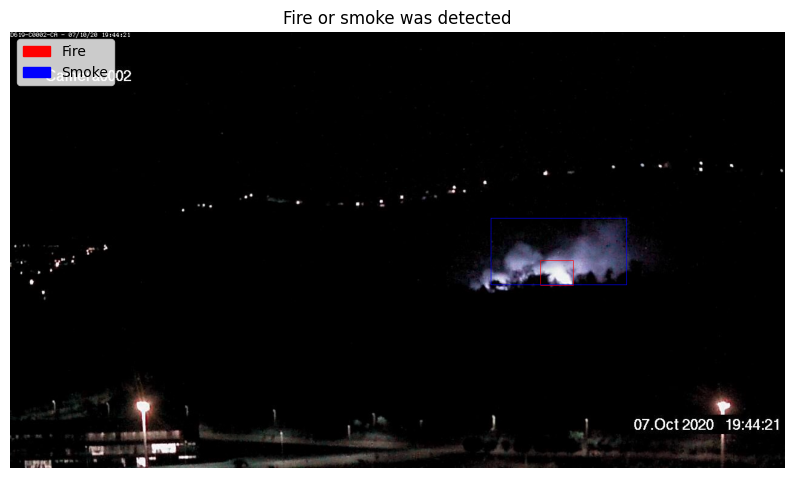

In [16]:
img = image_file.load_img()

# add bounding boxes to the image
img.add_rois_from_file(label_file)
SMOKE = "0"; FIRE = "1"
colors = { SMOKE: BLUE, FIRE: RED}
boxed = img.get_img_with_bounding_boxes(colors, GREEN)

# plot the image
plt.figure(figsize=(10, 10))
if (img.rois != []): caption = "Fire or smoke was detected"
else: caption = "Fire or smoke was NOT detected"
plt.title(caption)
plt.imshow(boxed)
plt.axis("off")
red_patch = plt.Rectangle((0, 0), 1, 1, color='red')
blue_patch = plt.Rectangle((0, 0), 1, 1, color='blue')
labels = ['Fire', 'Smoke']
plt.legend([red_patch, blue_patch], labels, loc='upper left')

plt.show()

## YOLO v5 Train

In [18]:
MODELS_PATH = os.path.join(ROOT_PATH, "models")
YOLOV5_WEIGHTS_PATH = os.path.join(MODELS_PATH, "yolov5.pt")
YOLOV5_REPO_PATH = os.path.join(ROOT_PATH, "yolov5")
YOLOV5_CONFIG_FILE_PATH = os.path.join(ROOT_PATH, "configs", "yolov5.yaml")

In [23]:
!cd {YOLOV5_REPO_PATH} && \
    python train.py \
    --img 640 \
    --batch 16 \
    --epochs 50 \
    --data {YOLOV5_CONFIG_FILE_PATH} \
    --weights {YOLOV5_WEIGHTS_PATH} \
    --workers 0

train: weights=/Users/bensmidt/ut/flaresight/models/yolov5.pt, cfg=, data=/Users/bensmidt/ut/flaresight/configs/yolov5.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=50, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, evolve_population=data/hyps, resume_evolve=None, bucket=, cache=None, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=0, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest, ndjson_console=False, ndjson_file=False
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v7.0-368-gb163ff8d Python-3.12.6 torch-2.4.1 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_

## YOLO v9

In [18]:
train_file = os.path.join(YOLOV9_PATH, "train_dual.py")
data_cfg = os.path.join(ROOT_PATH, "sample_usage", "train", "yolov5-fire-detection.yaml")
model_cfg = os.path.join(YOLOV9_PATH, "models", "detect", "yolov9-c.yaml")

In [19]:
!python {train_file} --workers 4 --device cpu --batch 16 --data {data_cfg} --img 640 --cfg {model_cfg} --weights '' --name yolov9-c --hyp hyp.scratch-high.yaml --min-items 0 --epochs 1 --close-mosaic 15

train_dual: weights='', cfg=c:\Users\benja\Documents\miru\flaresight\..\yolov9\models\detect\yolov9-c.yaml, data=c:\Users\benja\Documents\miru\flaresight\sample_usage\train\yolov5-fire-detection.yaml, hyp=hyp.scratch-high.yaml, epochs=1, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=None, image_weights=False, device=cpu, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=4, project=..\..\..\yolov9\runs\train, name=yolov9-c, exist_ok=False, quad=False, cos_lr=False, flat_cos_lr=False, fixed_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, seed=0, local_rank=-1, min_items=0, close_mosaic=15, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
YOLO  v0.1-86-g1bbce4d Python-3.11.4 torch-2.2.2+cpu CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_

## 